In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
data = pd.read_csv("../../data/Symphony-Data.csv")
data.head()

,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%)
0,13-Jun-24,1242.20,1244.0,1260.90,1226.80,154710,1.18%
1,12-Jun-24,1227.70,1210.0,1244.00,1204.00,246676,1.51%
2,11-Jun-24,1209.40,1163.4,1221.00,1157.30,472663,3.96%
3,10-Jun-24,1163.30,1145.0,1169.95,1137.05,157659,1.08%
4,07-Jun-24,1150.85,1108.0,1160.75,1103.70,359926,3.90%


In [4]:
data = data.drop(["OPEN", "HIGH", "LOW", "VOLUME", "CHANGE(%)"], axis=1)
data.head()

,DATE,PRICE
0,13-Jun-24,1242.20
1,12-Jun-24,1227.70
2,11-Jun-24,1209.40
3,10-Jun-24,1163.30
4,07-Jun-24,1150.85


In [5]:
data.dtypes

DATE      object
PRICE    float64
dtype: object

In [10]:
data["DATE"]= pd.to_datetime(data["DATE"], format="%d-%b-%y")
data = data.sort_values(by="DATE")
data.head()

,DATE,PRICE
1238,2019-06-18,1204.90
1237,2019-06-19,1243.95
1236,2019-06-20,1254.45
1235,2019-06-21,1232.55
1234,2019-06-24,1228.65


In [13]:
data["MA"] = data["PRICE"].rolling(window=30).mean()
data.head()

,DATE,PRICE,MA
1238,2019-06-18,1204.90,NaN
1237,2019-06-19,1243.95,NaN
1236,2019-06-20,1254.45,NaN
1235,2019-06-21,1232.55,NaN
1234,2019-06-24,1228.65,NaN


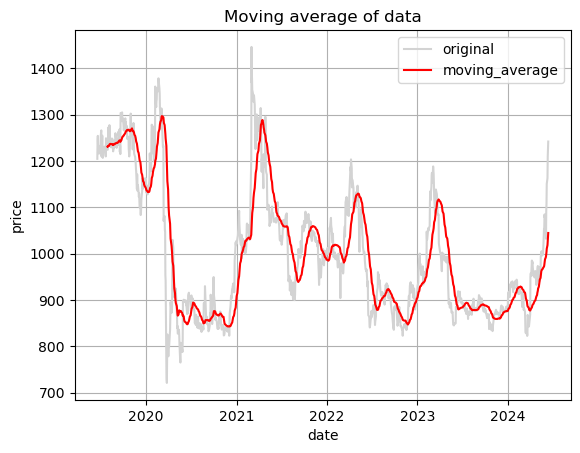

In [15]:
plt.plot(data["DATE"], data["PRICE"], label="original", color="lightgrey")
plt.plot(data["DATE"], data["MA"], label="moving_average", color="red")
plt.title("Moving average of data")
plt.xlabel("date")
plt.ylabel("price")
plt.legend()
plt.grid()

In [26]:
#to bring the trend value ie MA near zero in order to plot it with seasonal variation
data["DETRENDED"] = data["PRICE"]- data["MA"]
data.head()

,DATE,PRICE,MA,TREND,SEASONAL,CHANGE_IN_TREND,DETRENDED
1238,2019-06-18,1204.90,NaN,NaN,NaN,NaN,NaN
1237,2019-06-19,1243.95,NaN,NaN,NaN,NaN,NaN
1236,2019-06-20,1254.45,NaN,NaN,NaN,NaN,NaN
1235,2019-06-21,1232.55,NaN,NaN,NaN,NaN,NaN
1234,2019-06-24,1228.65,NaN,NaN,NaN,NaN,NaN


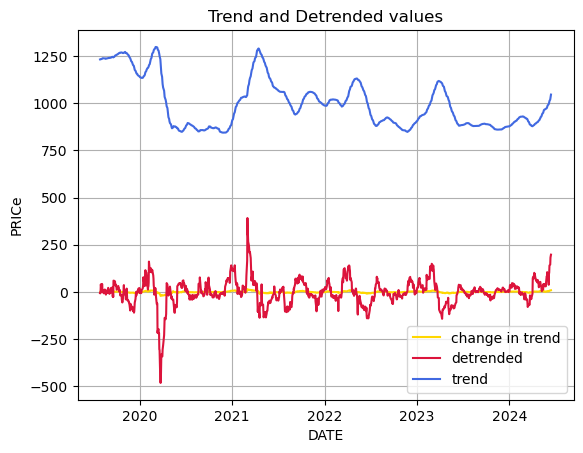

In [35]:
plt.plot(data["DATE"], data["MA"].diff(), label="change in trend", color="gold")
plt.plot(data["DATE"], data["DETRENDED"], label ="detrended", color="crimson")
plt.plot(data["DATE"], data["MA"], label="trend", color="royalblue")
plt.xlabel("DATE")
plt.ylabel("PRICe")
plt.title("Trend and Detrended values")
plt.legend()
plt.grid()